In [2]:
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import imblearn
import warnings
warnings.filterwarnings('ignore')

In [3]:
def upsample_label(temp_x, temp_y):
    y_time_list = temp_y['time'].values
    y_label = temp_y['label'].values
    jdx = 0
    label_list = []
    for index,row in temp_x.iterrows():
        try:
            if row['time'] > y_time_list[jdx]:
                jdx+=1
            label_list.append(y_label[jdx])
        except:
            label_list.append(y_label[jdx - 1])
    return label_list

In [4]:
filepath = "TrainingData/"
column_list = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z','subject', 'time', 'label']
final_df = pd.DataFrame([], columns = column_list)
for i in glob.glob(filepath + '*.csv'):
    df_type = i.split('.')[0].split('__')[1]
    file_name = i.split('\\')[1].split('__')[0]
    if df_type == 'x':
        x = open(filepath + file_name + '__x.csv')
        x = pd.read_csv(x)
        x['subject'] = [file_name] * x.shape[0]
        
        x_time = open(filepath + file_name + '__x_time.csv')
        x_time = pd.read_csv(x_time)
        x['time'] = x_time
        
        y = open(filepath + file_name + '__y.csv')
        y = pd.read_csv(y)
        y['subject'] = [file_name] * y.shape[0]
        
        y_time = open(filepath + file_name + '__y_time.csv')
        y_time = pd.read_csv(y_time)
        y['time'] = y_time
        
        y.columns = ['label', 'subject', 'time']
        label_list = upsample_label(x, y)
        x['label'] = label_list
        x.columns = column_list
        final_df = pd.concat([final_df, x], ignore_index=True)

In [5]:
final_df.shape

(1341617, 9)

In [6]:
final_df.head(20)

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,subject,time,label
0,4.186920,8.344455,2.908057,0.005771,-0.004480,-0.003345,subject_001_01,0.025,0
1,4.544637,8.408659,2.890000,0.007967,0.022412,0.001159,subject_001_01,0.050,0
2,4.849308,8.411614,2.900692,0.027778,-0.010670,-0.014223,subject_001_01,0.075,0
3,4.509190,8.118649,2.847298,0.021577,-0.045498,-0.021111,subject_001_01,0.100,0
4,4.226515,8.273807,2.851742,0.012534,0.000445,-0.016830,subject_001_01,0.125,0
5,4.532063,8.398341,2.856682,0.014484,0.028769,-0.011091,subject_001_01,0.150,0
6,4.433669,8.294719,2.823521,0.016340,-0.029434,-0.008998,subject_001_01,0.175,0
7,4.160676,8.260676,2.827568,0.011222,-0.016748,-0.006027,subject_001_01,0.200,0
8,4.432763,8.272613,2.790050,-0.002715,0.023094,0.012222,subject_001_01,0.225,0
9,4.511362,8.256774,2.820538,-0.002248,0.001547,0.011137,subject_001_01,0.250,0


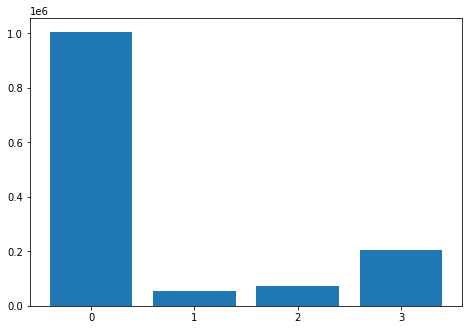

In [7]:
x_label = ['0', '1', '2', '3']
y_label = []
for i in range(4):
    y_label.append(final_df['label'].value_counts()[i])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x_label, y_label)
plt.show()

In [8]:
print(final_df['label'].value_counts())
class_0 = final_df[final_df['label'] == 0]
class_1 = final_df[final_df['label'] == 1]
class_2 = final_df[final_df['label'] == 2]
class_3 = final_df[final_df['label'] == 3]

0    1006897
3     206436
2      73068
1      55216
Name: label, dtype: int64


In [9]:
class_0_downsampled = class_0.sample(replace=False, n=55216,random_state=123)
print(class_0.shape)
print(class_0_downsampled.shape)

(1006897, 9)
(55216, 9)


In [10]:
class_2_downsampled = class_2.sample(replace=False, n=55216,random_state=123)
print(class_2.shape)
print(class_2_downsampled.shape)

(73068, 9)
(55216, 9)


In [11]:
class_3_downsampled = class_3.sample(replace=False, n=55216,random_state=123)
print(class_3.shape)
print(class_3_downsampled.shape)

(206436, 9)
(55216, 9)


In [12]:
df_undersampled = pd.concat([class_0_downsampled, class_1, class_2_downsampled, class_3_downsampled], axis=0)

In [13]:
df_undersampled.head(20)

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,subject,time,label
785318,2.107531,8.885625,1.040930,-0.419555,-0.552761,-0.194650,subject_004_01,655.025,0
1049282,-10.299510,23.351750,-0.549145,-1.267482,0.434679,0.318723,subject_006_02,943.950,0
256067,1.644039,6.795337,11.191570,7.758724,0.777326,-0.203081,subject_001_05,1247.700,0
454847,-1.045649,4.183783,3.189032,-1.224195,0.146200,-0.043950,subject_002_01,1318.875,0
691099,-0.333391,-2.240857,0.612116,-1.732334,-1.053626,0.434260,subject_003_01,875.875,0
371574,-3.358477,21.986220,-1.396423,-2.917136,3.200340,0.589119,subject_001_08,906.075,0
875125,1.177982,8.114675,-1.808584,-1.060109,-0.701966,0.067352,subject_005_01,1180.625,0
1009350,5.661356,12.570670,0.407217,-3.675363,-0.014462,-0.852315,subject_006_01,1148.750,0
768949,1.968477,9.134568,0.091318,-0.822800,0.159099,-0.024178,subject_004_01,245.800,0
628289,0.685906,1.652356,9.724226,5.578707,2.630271,-0.735256,subject_002_05,363.575,0


In [22]:
df = df_undersampled.sort_values(by=['subject', 'time'])

In [23]:
df.to_csv('balanced_df.csv')

In [20]:
# pip install --upgrade tensorflow-gpu --user

  Using cached tensorflow_gpu-2.8.0-cp38-cp38-win_amd64.whl (438.0 MB)
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-cpu 2.6.1 requires numpy~=1.19.2, but you have numpy 1.22.3 which is incompatible.
You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [21]:
pip uninstall numpy

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install numpy==1.19.2